In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)


import json # to work with json file format
from bs4 import BeautifulSoup

In [2]:
frauds = pd.read_json('data/data.json')

In [3]:
frauds.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [4]:
frauds['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [5]:
frauds['fraud'] = frauds['acct_type'].str.contains('fraud').map({True: 1, False:0})

In [6]:
frauds.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


In [7]:
frauds['fraud'].value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [8]:
frauds.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,fraud
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,14337.000000,8928.000000,14337.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000,14337.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,0.073028,0.202061,0.842087,41.629351,28.010672,33.753296,4.531344e+06,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368,0.090186
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,0.260191,0.401560,0.364672,23.158100,94.769678,125.178875,1.987661e+06,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034,0.286458
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.714600e+04,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183,0.000000
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,0.000000,0.000000,1.000000,26.000000,2.000000,0.000000,2.902989e+06,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828,0.000000
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,0.000000,0.000000,1.000000,38.000000,8.000000,2.000000,4.580386e+06,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579,0.000000
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,0.000000,0.000000,1.000000,53.000000,23.000000,13.000000,6.073577e+06,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449,0.000000
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,1.000000,1.000000,1.000000,254.000000,2000.000000,1858.000000,8.792893e+06,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492,1.000000


In [9]:
frauds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

## BeautifulSoup for Description column

In [10]:
soups = []
for i in range(len(frauds['description'])):
    soup = BeautifulSoup(frauds['description'][i], 'html.parser').text
    soups.append(soup)

In [11]:
frauds['soup_text'] = pd.Series(soups)

In [12]:
frauds.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,soup_text
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1,\n \nParty Starz Entertaintment & Diverse Inte...
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0,"Join us for a quick, one-night, community-buil..."
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0,Teacher Training on the Desired Results Develo...
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,0,Affiliations are now due in respect of the 201...
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0,Writers and filmmakers need to understand thei...


# Plots

In [13]:
def bar_percent(ax, df_col):
    # df_col = df['col_name']
    
    total = len(df_col)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 100,
                '{:1.2f}'.format(height/total),
                ha="center") 
        
def sns_count(col_name, hue, data):
    '''
    inputs
    
    col_name: string
    data: pd.DataFrame
    hue: string
    '''
    
    fig, ax = plt.subplots(figsize=(10,6))

    ax = sns.countplot(x=f'{col_name}', hue=hue, data=data)
    ax.set_title(f'{col_name} vs {hue}')
    bar_percent(ax, data[col_name])

## Delivery Method

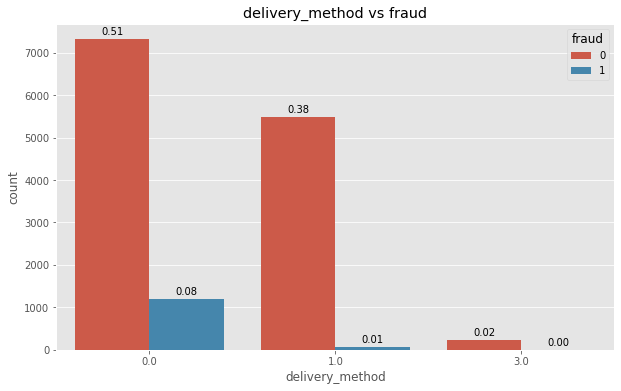

In [14]:
sns_count('delivery_method', 'fraud', frauds)

In [15]:
frauds['delivery_method'].value_counts(dropna=False)

0.0    8520
1.0    5554
3.0     247
NaN      16
Name: delivery_method, dtype: int64

## Payout Type

In [16]:
frauds['payout_type'].value_counts()

ACH      10666
CHECK     3178
           493
Name: payout_type, dtype: int64

In [17]:
frauds['payout_type'] = frauds['payout_type'].replace('', 'Other')

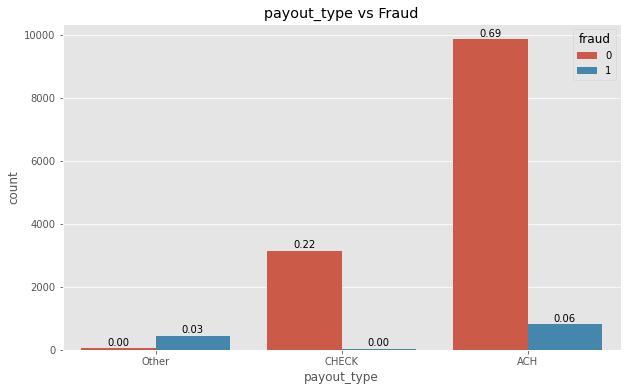

In [45]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(x='payout_type', hue='fraud', data=frauds);
ax.set_title('payout_type vs Fraud')
bar_percent(ax, frauds['payout_type'])

plt.savefig('images/payout_type.png')

## Venue Country

In [19]:
frauds['venue_country'].unique()

array(['US', None, '', 'CA', 'FR', 'GB', 'AU', 'ES', 'NL', 'DE', 'IE',
       'NZ', 'NO', 'AR', 'SG', 'BE', 'PH', 'IT', 'AT', 'MA', 'ID', 'NI',
       'VN', 'AE', 'DO', 'PR', 'CZ', 'DK', 'TR', 'BS', 'HT', 'KH', 'HU',
       'IN', 'NA', 'KE', 'PK', 'HK', 'SE', 'HR', 'VI', 'TH', 'JM', 'LU',
       'PL', 'CM', 'MX', 'QA', 'IS', 'CN', 'FI', 'DZ', 'ZA', 'UY', 'PT',
       'MC', 'SK', 'RU', 'BG', 'JP', 'TT', 'CO', 'RE', 'NG', 'OM', 'JE',
       'CY', 'IL', 'MY', 'BR'], dtype=object)

In [20]:
frauds[frauds['venue_country']==''].head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,soup_text
11,premium,1298070000,1679,10,US,USD,1.0,<p><a fishy with local Dept. of Fish and Game...,foragesf.com,1295297252,1297638000,1.295297e+09,1297630800,0,685.44,0,0.0,0,y,Wild Seafood: San Francisco Fishing Tour Feb 13,47,13,24,1213143,,8.0,forageSF,8.0,,ACH,"[{'name': '', 'created': '2010-09-22 01:10:26'...",27.0,27,0,"[{'event_id': 1213143, 'cost': 30.0, 'availabi...",430,1258180664,3,,,0.000000,0.000000,San Francisco location given in confirmation l...,,0,"monkeyface eel champion, blogger and street pe..."
31,premium,1314919800,6833,12,US,USD,0.0,"<p><font face=""arial, helvetica, sans-serif"" s...",weplayers.org,1301539100,1314487800,1.313344e+09,1314475200,0,120.01,0,0.0,1,y,We Players on Alcatraz Exhibition #4\r\nIMAGES...,60,3,3,1507815,"<p><span style=""font-size: x-small;""><a href=""...",9.0,We Players and the National Park Service,0.0,,ACH,"[{'name': '', 'created': '2011-02-03 01:11:38'...",13.0,150,0,"[{'event_id': 1507815, 'cost': 0.0, 'availabil...",219,1282602102,3,,,37.774929,-122.419415,ALCATRAZ ISLAND,,0,"We Players final 2011 Alcatraz exhibit, ""Image..."
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,1312329600,1.311721e+09,1312218000,0,16276.45,0,NaN,1,y,Real Estate Exhibition in London,32,9,0,1964043,"<p><span class=""vevent""><span class=""notransla...",0.0,The London Connection,12.0,,ACH,[],6.0,6,0,"[{'event_id': 1964043, 'cost': 500.0, 'availab...",0,1311717050,1,Hammersmith Road,,0.000000,0.000000,Olympia Exhibition Hall,,1,Welcome to London most visited exhibition for ...
56,premium,1317787200,1615,6,US,USD,1.0,"<table style=""width: 100%;"" border=""0"">\r\n<tb...",racetonowhere.com,1312469295,1317355200,1.312469e+09,1317348000,0,969.36,0,1.0,1,y,"Race to Nowhere, Flint Hill Elementary School,...",57,48,1034,1999765,"<p style=""text-align: center;""><a href=""http:/...",13.0,Reel Link Films,14.0,Reel Link Films,CHECK,"[{'name': 'Reel Link Films', 'created': '2010-...",56.0,56,1,"[{'event_id': 1999765, 'cost': 10.0, 'availabi...",553,1264709634,3,2444 Flint Hill Rd,,38.896202,-77.284691,Flint Hill Elementary School,,0,\n\n\n\n\n“An education film that gets it”Wash...
90,premium,1335830400,6127,8,US,USD,1.0,"<div style=""background-image: initial; backgro...",agiletraining.com,1321556821,1335398400,1.321557e+09,1335193200,0,1295.00,0,0.0,1,y,PMI® Agile Certified Practitioner (PMI ACP) Ce...,113,1,14,2523610,,0.0,Agile Transformation Inc,0.0,,ACH,"[{'name': '', 'created': '2011-06-01 01:12:17'...",158.0,158,1,"[{'event_id': 2523610, 'cost': 1246.2, 'availa...",247,1300217038,3,1820 Market Street,,38.629333,-90.206612,St. Louis Union Station Marriott,,0,\n \nPMI® Agile Certified Practitioner \n\nDo ...


In [21]:
# The top 5 countries had a huge difference between amounts of fraud
fraud_country = frauds.groupby('country').sum()['fraud'].sort_values(ascending=False).head(5).index

In [22]:
fraud_country

Index(['US', 'GB', 'CA', 'MA', ''], dtype='object', name='country')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


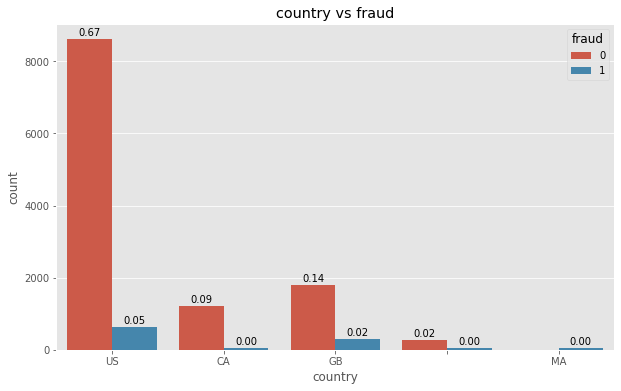

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(x=frauds[frauds['country'].isin(fraud_country)]['country'], hue=frauds['fraud'])
ax.set_title('country vs fraud');
bar_percent(ax, frauds[frauds['country'].isin(fraud_country)]['country'])

plt.savefig('images/country.png')

## Sale Duration

In [24]:
frauds['sale_duration'].value_counts()

0.0      360
1.0      355
22.0     256
40.0     244
30.0     244
        ... 
504.0      1
449.0      1
416.0      1
321.0      1
327.0      1
Name: sale_duration, Length: 375, dtype: int64

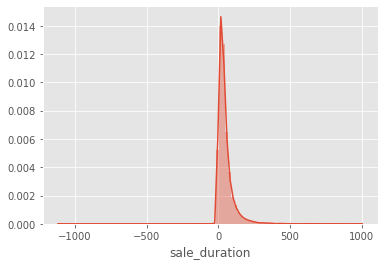

In [25]:
sns.distplot(frauds['sale_duration'].dropna(), bins=100)

In [26]:
frauds[frauds['sale_duration2'] < 0][['sale_duration', 'fraud']]

,sale_duration,fraud
152,-37.0,0
262,-1094.0,1
964,-19.0,1
1489,-1.0,1
3637,-1.0,1
5227,-86.0,0
8828,-24.0,0
9718,-28.0,0
11270,-1.0,1
11759,-1.0,1


## User Type

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


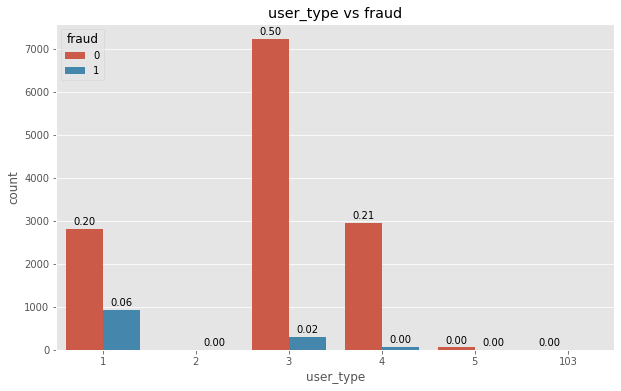

In [27]:
sns_count('user_type', 'fraud', frauds)

In [28]:
frauds.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud', 'soup_text'],
      dtype='object')

## Heatmap

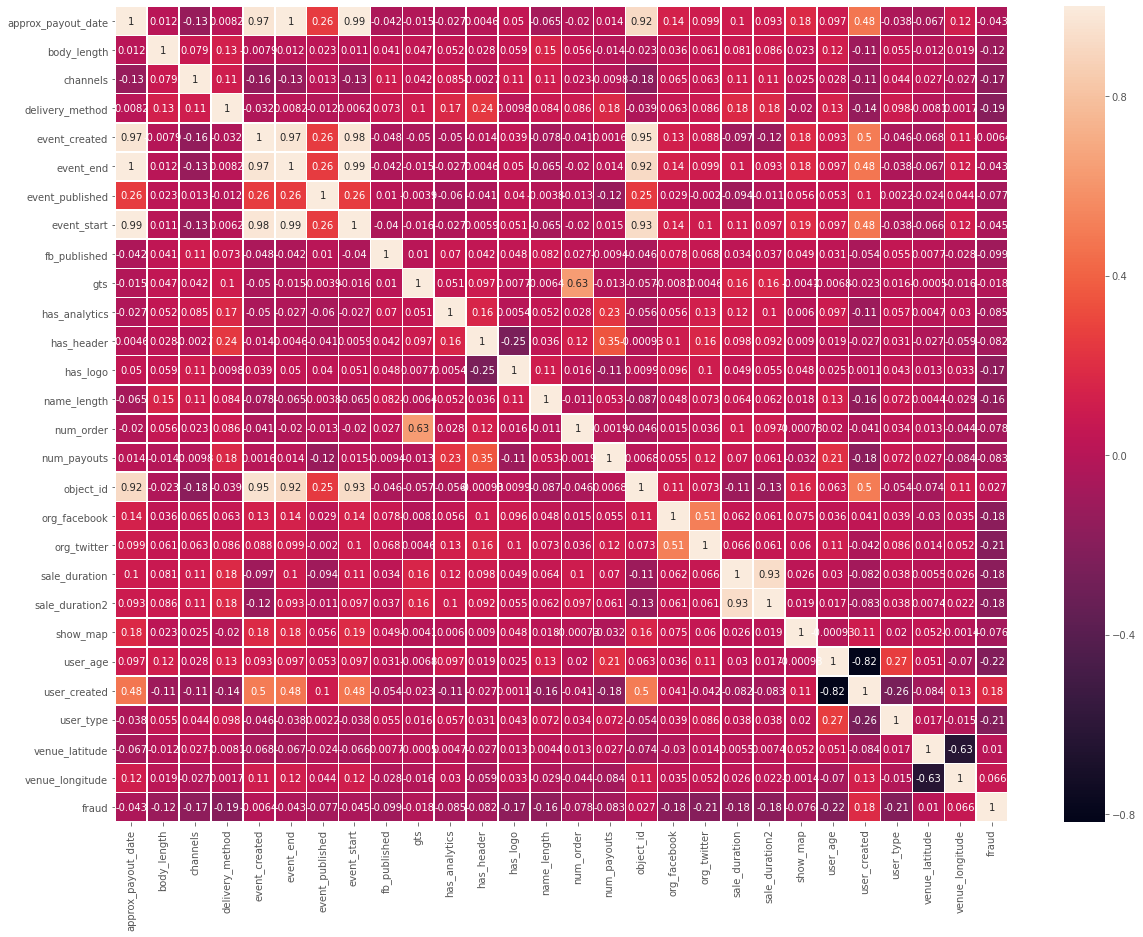

In [34]:
fig, ax = plt.subplots(figsize=(20,15))

ax = sns.heatmap(frauds.corr(), annot=True, linewidths=0.5)

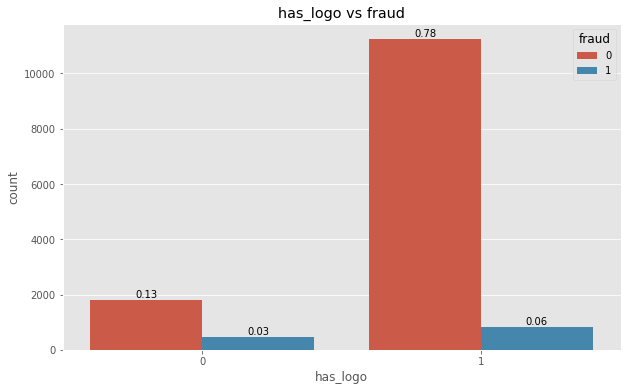

In [38]:
sns_count('has_logo', 'fraud', frauds)

In [40]:
frauds[['has_logo', 'fraud']].corr()

,has_logo,fraud
has_logo,1.000000,-0.169485
fraud,-0.169485,1.000000


## Currency

In [43]:
frauds['currency'].value_counts()

USD    9696
GBP    2222
CAD    1322
AUD     779
EUR     262
NZD      55
MXN       1
Name: currency, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


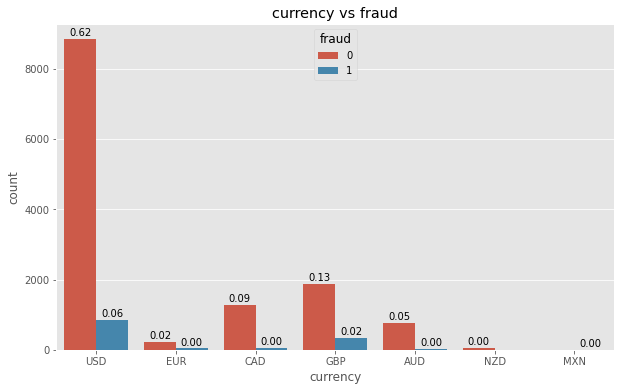

In [44]:
sns_count('currency', 'fraud', frauds)

In [47]:
from pymongo import MongoClient

In [48]:
client = MongoClient('localhost', 27017)
db = client['frauds']
table = db['new_events12']

In [49]:
events = table.find().sort([('sequence', -1)]).sort([('fraud_probability', -1)])

In [59]:
entries = table.find().sort([('sequence', -1)]).sort([('fraud_probability', -1)]).limit(50)
unable = 0
low = 0
medium = 0
high= 0
for each_ in entries:
    if each_['risk_factor'] == 'Unable to Predict':
        unable += 1
    elif each_['risk_factor'] == 'low':
        low += 1
    elif each_['risk_factor'] == 'medium':
        medium += 1
    else:
        high += 1
values = [unable, low, medium, high]

In [54]:
from flask import Flask, render_template, request, jsonify 

In [60]:
for value in values:
    print(value)

0
32
0
1


In [52]:
import pprint

for event in events:
    pprint.pprint(event)
    break
    

{'_id': ObjectId('5ed16ba0063b1dcea0706f8b'),
 'fraud_probability': 0.019,
 'name': 'Bobs & LoLo - Nature Rocks! (Whitby 11am)',
 'object_id': '5438696',
 'org_name': 'Bobolo Productions Inc.',
 'risk_factor': 'low',
 'sequence': '2985'}
